<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Deep Learning</font></span>
        <span><br><font size=3>Spring 2023</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Pytorch tutorial - Autograd</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:farshads7778@gmail.com">Farshad Sangari</a></font><br>
    </div>
</div>

In [44]:
import torch
from torchviz import make_dot

# PyTorch Autograd Tutorial
PyTorch's autograd package provides automatic differentiation for all operations on Tensors. This is useful for implementing machine learning models that require gradient computations.

To use autograd, we first need to create Tensors with the requires_grad flag set to True. This tells PyTorch to track the gradients for these Tensors.

In [100]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([4., 5., 6.], requires_grad=False)

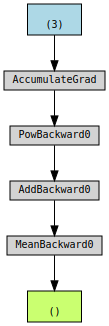

In [101]:
t = x**2 + y**2
z = t.mean()
make_dot(z)

In [102]:
z

tensor(30.3333, grad_fn=<MeanBackward0>)

In [96]:
x.grad.zero_()
y.grad.zero_()

z.backward()

We can access the gradients using the grad attribute of each Tensor.

In [97]:
print(x.grad)
print(y.grad)

tensor([0.6667, 1.3333, 2.0000])
tensor([2.6667, 3.3333, 4.0000])


### Another example

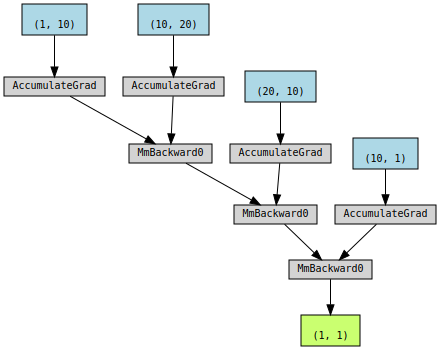

In [6]:
import torch.nn as nn

x = torch.rand([1,10],requires_grad= True)

layer1 = nn.Linear(10,20,bias=False)
layer2 = nn.Linear(20,10,bias=False)
layer3 = nn.Linear(10,1,bias=False)

layer1_w = list(layer1.parameters())[0].T.detach().clone()
layer1_w.requires_grad = True
layer2_w = list(layer2.parameters())[0].T.detach().clone()
layer2_w.requires_grad = True
layer3_w = list(layer3.parameters())[0].T.detach().clone()
layer3_w.requires_grad = True


x1 = x@layer1_w
x2 = x1@layer2_w
x3 = x2@layer3_w

x3.backward()

make_dot(x3)

### Statistics of network

##### Method1

In [7]:
with torch.no_grad():
    t = torch.exp(z)  
t

tensor(1.4914e+13)

##### Method2

In [8]:
t = z.detach()
t = torch.exp(t)
t

tensor(1.4914e+13)

### `.clone()` vs `.detatch()`

#### `.clone()`


z: tensor([17., 29., 45.], grad_fn=<AddBackward0>)


t: tensor([17., 29., 45.], grad_fn=<AddBackward0>)
if we use .clone(): 30.33333396911621


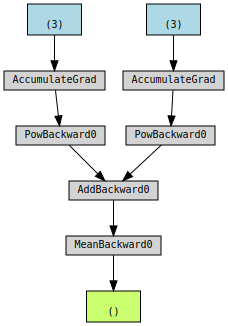

In [104]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([4., 5., 6.], requires_grad=True)
z = x**2 + y**2
print(f"z: {z}\n\n")

q = z.mean()

o = q.clone()


o.backward()

print(f"t: {t}")
print(f"if we use .clone(): {o}")

make_dot(q)

#### `.detatch()`
This function is differentiable, so gradients will flow back from the result of this operation to input. To create a tensor without an autograd relationship to input `.detach()`.

In [34]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([4., 5., 6.], requires_grad=True)
z = x**2 + y**2
print(f"z: {z}\n\n")

t = z

print(f"t: {t}")
print(f"if we use detatch(): {t.detach()}")

z: tensor([17., 29., 45.], grad_fn=<AddBackward0>)


t: tensor([17., 29., 45.], grad_fn=<AddBackward0>)
if we use detatch(): tensor([17., 29., 45.])


### Additional

#### 1. Jaccobian matrix

In [105]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([4., 5., 6.], requires_grad=True)
z = x**2 + y**2

In [108]:
z.backward(torch.ones([3]))

> x.grad = J^T * v

In [109]:
x.grad

tensor([2., 4., 6.])

##### 2.retain_graph() = True
<img src="figs/CG1.png">

In [110]:
import torch
from torch.autograd import Variable
a = Variable(torch.rand(1, 4), requires_grad=True)
b = a**2
c = b*2
d = c.mean()
e = c.sum()

In [15]:
d.backward(retain_graph=True) # fine
e.backward(retain_graph=True) # fine
d.backward() # also fine
e.backward() # error will occur!

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

#### 3.create_graph = True

In [41]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([4., 5., 6.], requires_grad=True)
t = torch.sum(x*y)
z = t**2

z.backward(create_graph=True)

In [18]:
dz_dx1 = x.grad[0]
dz_dx1

tensor(256., grad_fn=<SelectBackward0>)

In [19]:
dz_dx1.backward()

In [111]:
## [d2z/dx1dx1 , d2z/dx1dx2 , d2z/dx1dx3]  
x.grad